### Data Preprocessing

In [1]:
import pandas as pd

df = pd.read_csv('IDS_ALLCountries_Data.csv')
df.drop(inplace=True, columns=df.columns[-8:])
df.drop(inplace=True, columns=['Counterpart-Area Name', 'Counterpart-Area Code', 'Series Name'])
df.head()

,Country Name,Country Code,Series Code,1970,1971,1972,1973,1974,1975,1976,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,AFG,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,29.8333,0.0,0.0,19.8356,0.0,17.9041,0.0
1,Afghanistan,AFG,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,29.8333,0.0,0.0,19.8356,0.0,17.9041,0.0
2,Afghanistan,AFG,DT.GPA.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0
3,Afghanistan,AFG,DT.GRE.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,81.9289,0.0,0.0,64.2646,0.0,73.0790,0.0
4,Afghanistan,AFG,DT.GRE.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,81.9289,0.0,0.0,64.2646,0.0,73.0790,0.0


In [2]:
# Data Dimension
df.shape

(77389, 54)

### Handle missing data

In [3]:
# Filter cat and num columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns) - set(num_cols))

##### Categorical

In [4]:
# Before dropping categorical missing columns
df[cat_cols].isnull().sum()

Country Name    3
Series Code     5
Country Code    5
dtype: int64

In [5]:
# After dropping categorical missing columns
df.dropna(
    subset=cat_cols, inplace=True
)
df[cat_cols].isnull().sum()


Country Name    0
Series Code     0
Country Code    0
dtype: int64

#### Numeric

In [6]:
# Calculate missing value percentage
missing = df[num_cols]
missing = missing.isnull().sum() / len(df)

# Convert to DataFrame class
missing = missing.to_frame()
missing.columns = ['count']
missing.index.names = ['years']
missing['years'] = missing.index
missing.head()

,count,years
years,,
1970,0.547801,1970
1971,0.536816,1971
1972,0.527344,1972
1973,0.517213,1973
1974,0.510067,1974


##### Visualization

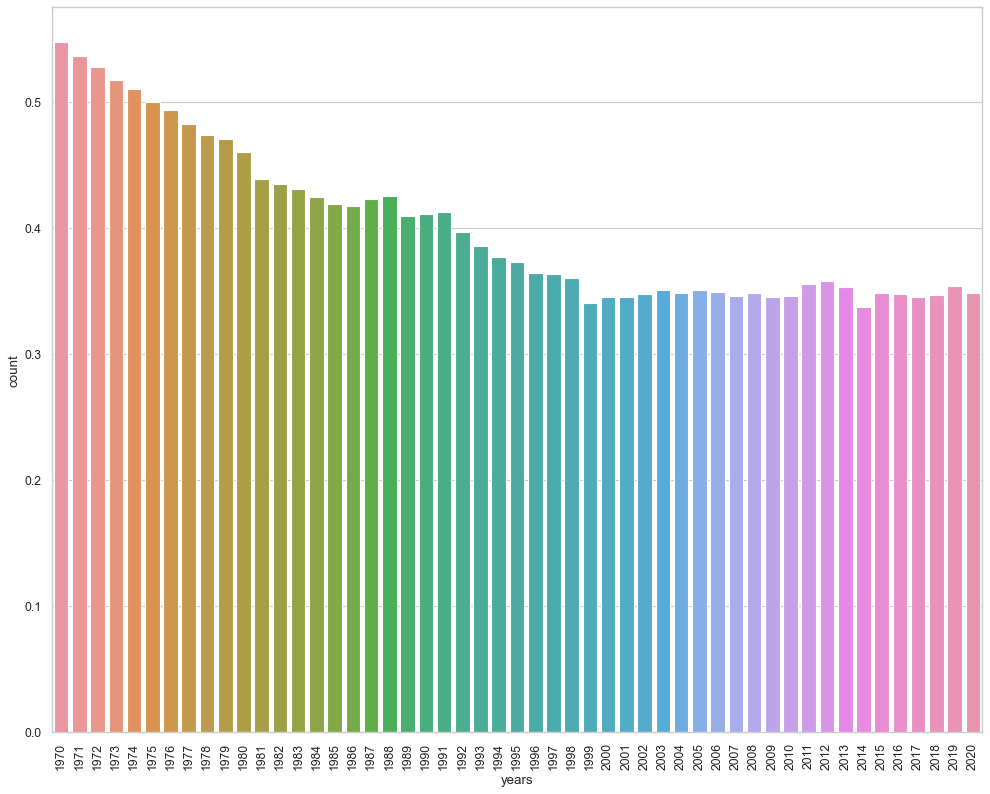

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12), dpi=80)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'years', y = 'count', data=missing)
plt.xticks(rotation = 90)
# plt.show()
plt.savefig('Missing.png')

##### Imputation

In [8]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=1)
df[num_cols] = imputer.fit_transform(df[num_cols])

C:\Users\dtngh\miniconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
# Verify the dataset no longer has missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77384 entries, 0 to 77383
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  77384 non-null  object 
 1   Country Code  77384 non-null  object 
 2   Series Code   77384 non-null  object 
 3   1970          77384 non-null  float64
 4   1971          77384 non-null  float64
 5   1972          77384 non-null  float64
 6   1973          77384 non-null  float64
 7   1974          77384 non-null  float64
 8   1975          77384 non-null  float64
 9   1976          77384 non-null  float64
 10  1977          77384 non-null  float64
 11  1978          77384 non-null  float64
 12  1979          77384 non-null  float64
 13  1980          77384 non-null  float64
 14  1981          77384 non-null  float64
 15  1982          77384 non-null  float64
 16  1983          77384 non-null  float64
 17  1984          77384 non-null  float64
 18  1985          77384 non-nu

In [10]:
# Save the preprocessed dataset
df.to_csv('Preprocessed data.gz', compression='gzip', index=False)